# Use ARNN called with LSTM to predict stock price of TQQQ
## TQQQ is a derivate which triple the nasdaq performace X3 UP


In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')

2022-12-10 18:28:57.753547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
df = web.DataReader('TQQQ', data_source ='yahoo', start= '2018-7-28', end ='2022-12-10')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-30,15.752500,14.830000,15.737500,15.057500,50402800.0,15.026418
2018-07-31,15.572500,14.977500,15.217500,15.357500,47856000.0,15.325798
2018-08-01,15.707500,15.310000,15.500000,15.567500,34650800.0,15.535365
2018-08-02,16.250000,15.210000,15.225000,16.187500,46121200.0,16.154085
2018-08-03,16.347500,16.075001,16.272499,16.332500,36066800.0,16.298786
...,...,...,...,...,...,...
2022-12-05,23.200001,21.860001,22.879999,22.230000,150990000.0,22.230000
2022-12-06,22.209999,20.500000,22.180000,20.820000,169900500.0,20.820000
2022-12-07,21.030001,20.180000,20.559999,20.570000,173667900.0,20.570000


In [21]:
df.shape

(1101, 6)

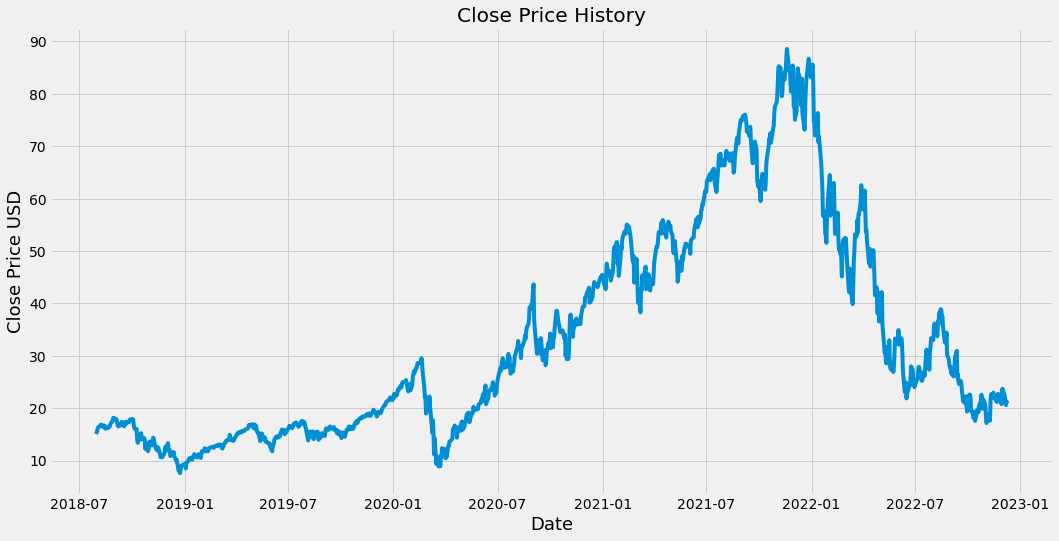

In [22]:
plt.figure(figsize= (16,8))
plt.title ('Close Price History')
plt.plot (df ['Close'])
plt.xlabel('Date', fontsize =18)
plt.ylabel ('Close Price USD', fontsize=18)
plt.show()


# data frame con solo i prezzi di chiusura

In [23]:
data =df.filter(['Close'])
dataset =data.values
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

881

# scale the data

In [24]:
scaler =MinMaxScaler (feature_range =(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.09213004],
       [0.09583501],
       [0.09842848],
       ...,
       [0.16020871],
       [0.16922411],
       [0.16416067]])

In [25]:

train_data =scaled_data [0:training_data_len,:]
#spit
x_train =[]
y_train=[]


In [26]:

for i in range(60 ,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.09213004, 0.09583501, 0.09842848, 0.1060854 , 0.10787614,
       0.11158109, 0.11358795, 0.11414369, 0.11395845, 0.10911113,
       0.1085245 , 0.11226034, 0.10475779, 0.10657941, 0.10654853,
       0.10614714, 0.10821576, 0.11056222, 0.10954337, 0.11519342,
       0.12149186, 0.12244899, 0.13001328, 0.12874741, 0.12939579,
       0.12674057, 0.11797215, 0.1121986 , 0.11016086, 0.1119516 ,
       0.11652103, 0.11469944, 0.12087438, 0.11923802, 0.11025348,
       0.1151008 , 0.11463768, 0.12118312, 0.11775603, 0.11957764,
       0.12044213, 0.12022601, 0.12615394, 0.12581432, 0.12708019,
       0.12581432, 0.12646269, 0.11389669, 0.1060854 , 0.10250394,
       0.1040168 , 0.07835994, 0.07138226, 0.08533761, 0.07857606,
       0.09342679, 0.09404427, 0.08101516, 0.08030505, 0.08292939])]
[0.08098428352732476]



In [27]:
y_train

[0.08098428352732476,
 0.05721077777707112,
 0.07270986841655849,
 0.059773381848264334,
 0.051560717510295534,
 0.05717990827955022,
 0.06736855023601446,
 0.07440798522409889,
 0.0668745558313906,
 0.06529995234720071,
 0.06866529290924933,
 0.08360863837131541,
 0.08058292117077487,
 0.07172187960731077,
 0.05717990827955022,
 0.05711815750675278,
 0.05328970381535683,
 0.061162744791817575,
 0.05946463976203281,
 0.04476828561340082,
 0.03708049695533239,
 0.040013582107798984,
 0.03704961568005585,
 0.04603414701135916,
 0.04748526072770984,
 0.06088487220310693,
 0.05946463976203281,
 0.06267559750321003,
 0.07070302130054218,
 0.05261045709234066,
 0.05474080575395185,
 0.040198834426191266,
 0.044397792754371834,
 0.045879775968243414,
 0.04939948757340781,
 0.04943036884868435,
 0.038624230942001375,
 0.030071943242524476,
 0.03214054113133824,
 0.02303250825444003,
 0.01833956729939125,
 0.0075025481174317565,
 0.0,
 0.0168884535830406,
 0.01846305706723049,
 0.01799994393788

In [28]:
x_train

[array([0.09213004, 0.09583501, 0.09842848, 0.1060854 , 0.10787614,
        0.11158109, 0.11358795, 0.11414369, 0.11395845, 0.10911113,
        0.1085245 , 0.11226034, 0.10475779, 0.10657941, 0.10654853,
        0.10614714, 0.10821576, 0.11056222, 0.10954337, 0.11519342,
        0.12149186, 0.12244899, 0.13001328, 0.12874741, 0.12939579,
        0.12674057, 0.11797215, 0.1121986 , 0.11016086, 0.1119516 ,
        0.11652103, 0.11469944, 0.12087438, 0.11923802, 0.11025348,
        0.1151008 , 0.11463768, 0.12118312, 0.11775603, 0.11957764,
        0.12044213, 0.12022601, 0.12615394, 0.12581432, 0.12708019,
        0.12581432, 0.12646269, 0.11389669, 0.1060854 , 0.10250394,
        0.1040168 , 0.07835994, 0.07138226, 0.08533761, 0.07857606,
        0.09342679, 0.09404427, 0.08101516, 0.08030505, 0.08292939]),
 array([0.09583501, 0.09842848, 0.1060854 , 0.10787614, 0.11158109,
        0.11358795, 0.11414369, 0.11395845, 0.10911113, 0.1085245 ,
        0.11226034, 0.10475779, 0.10657941, 0.

In [29]:
#numpy
x_train,y_train =np.array(x_train), np.array (y_train)


In [30]:
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(821, 60, 1)

In [31]:
model= Sequential()
model.add (LSTM(50,return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add (LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [32]:
model.compile (optimizer ='adam',loss ='mean_squared_error')



In [33]:
model.fit(x_train,y_train,batch_size =1,epochs=1)

821/821 [==============================] - 34s 36ms/step - loss: 0.0040


In [34]:
test_data =scaled_data[training_data_len- 60: ,:]
x_test=[]
y_test =dataset[training_data_len:,:]
for i in range (60,len(test_data)):
    x_test.append (test_data[i-60:i,0])
    

In [35]:
x_test =np.array (x_test)
x_test.shape

(220, 60)

In [19]:
x_test =np.reshape(x_test, (x_test.shape[0],x_test.shape[1] ,1))
x_test.shape

(119, 60, 1)

In [36]:
predictions =model.predict (x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 31ms/step


In [37]:
rmse =np.sqrt (np.mean(predictions -y_test)**2)
rmse

0.5888224775140936

/var/folders/z7/xf8d8ljx2gb1t82t03gnmmkc0000gn/T/ipykernel_89690/4159042666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


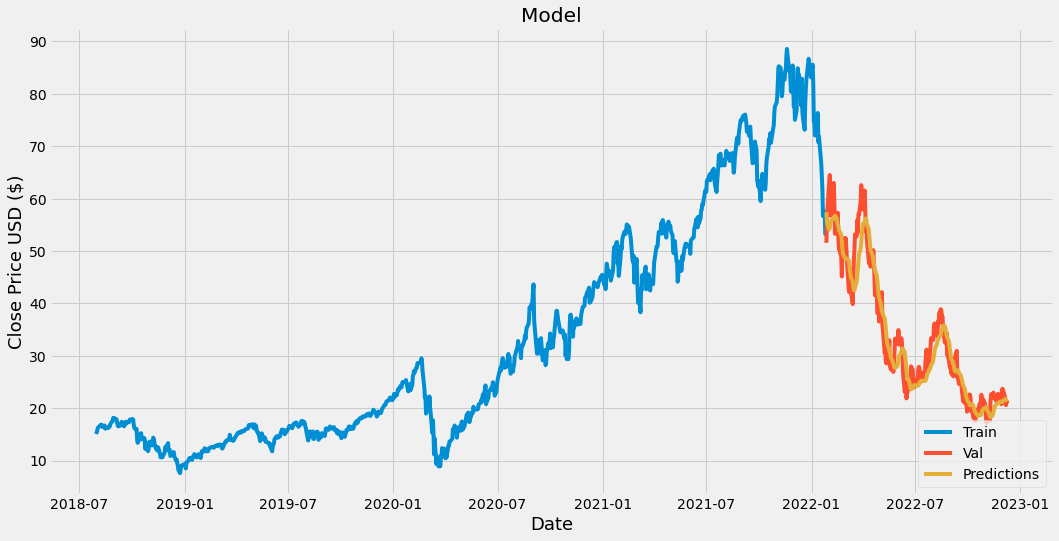

In [38]:
train = data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title ('Model')
plt.xlabel ('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend (['Train','Val','Predictions'], loc= 'lower right')
plt.show()

In [39]:
valid

,Close,Predictions
Date,,
2022-01-27,51.560001,57.422104
2022-01-28,56.369999,55.508045
2022-01-31,61.830002,54.303879
2022-02-01,63.009998,54.091892
2022-02-02,64.500000,54.541893
...,...,...
2022-12-05,22.230000,21.645689
2022-12-06,20.820000,21.753254
2022-12-07,20.570000,21.669466


In [40]:
tqqq_quote =web.DataReader ('TQQQ',data_source='yahoo', start='2018-7-20', end ='2020-12-11' )
new_df= tqqq_quote.filter (['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled= scaler.transform(last_60_days)
X_test =[]
X_test.append(last_60_days_scaled)
X_test =np.array (X_test)
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price =model.predict(X_test)
pred_price =scaler.inverse_transform (pred_price)
print(pred_price)

1/1 [==============================] - 1s 1s/step
[[39.561966]]


In [41]:
tqqq_quote2 =web.DataReader ('TQQQ',data_source='yahoo', start='2020-9-9', end ='2020-12-11' )
print (tqqq_quote2['Close'])


Date
2020-09-09    33.017502
2020-09-10    31.107500
2020-09-11    30.427500
2020-09-14    31.995001
2020-09-15    33.355000
                ...    
2020-12-07    42.607498
2020-12-08    42.997501
2020-12-09    40.117500
2020-12-10    40.610001
2020-12-11    40.325001
Name: Close, Length: 67, dtype: float64
